# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
#pip install citipy <-install to use citipy 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.7/557.7 kB 3.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559686 sha256=4f7fd4c377bffdc9a172b21a4c71c5fcf2f5134cde77237c3badecda7fc2a842
  Stored in directory: /Users/vickylynnmauldin/Library/Caches/pip/wheels/72/ae/63/5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
# code was coming up empty bc date was not tracked correctly




# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:

#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + "Kentucky"
#print(url)

In [45]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #https://www.geeksforgeeks.org/python-string-replace/
    city_url =  url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
      # Convert the date to ISO standard.
    #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.fromtimestamp.html
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')  
                


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | denpasar
Processing Record 2 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 1 | tezu
Processing Record 4 of Set 1 | lompoc
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | feijo
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | karratha
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | flinders
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | port hardy
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | kloulklubed
Processing Record 18 of Set 1 | weligama
Processing Record 19 of Set 1 | zhezkazgan
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 o

Processing Record 35 of Set 4 | lolua
City not found. Skipping...
Processing Record 36 of Set 4 | boguchany
Processing Record 37 of Set 4 | san felipe
Processing Record 38 of Set 4 | spencer
Processing Record 39 of Set 4 | seydi
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | aklavik
Processing Record 42 of Set 4 | gornopravdinsk
Processing Record 43 of Set 4 | grindavik
Processing Record 44 of Set 4 | burgeo
Processing Record 45 of Set 4 | iqaluit
Processing Record 46 of Set 4 | doha
Processing Record 47 of Set 4 | saskylakh
Processing Record 48 of Set 4 | puerto leguizamo
Processing Record 49 of Set 4 | santa cruz
Processing Record 0 of Set 5 | toliary
City not found. Skipping...
Processing Record 1 of Set 5 | yenagoa
Processing Record 2 of Set 5 | naze
Processing Record 3 of Set 5 | caruray
Processing Record 4 of Set 5 | jackson
Processing Record 5 of Set 5 | salinas
Processing Record 6 of Set 5 | sinnamary
Processing Record 7 of Set 5 | karakendzha
City not

City not found. Skipping...
Processing Record 25 of Set 8 | taoudenni
Processing Record 26 of Set 8 | sorochinsk
Processing Record 27 of Set 8 | nishihara
Processing Record 28 of Set 8 | luzhou
Processing Record 29 of Set 8 | mount isa
Processing Record 30 of Set 8 | kudahuvadhoo
Processing Record 31 of Set 8 | bronnoysund
Processing Record 32 of Set 8 | otaru
Processing Record 33 of Set 8 | kyra
Processing Record 34 of Set 8 | nyrob
Processing Record 35 of Set 8 | college
Processing Record 36 of Set 8 | atasu
Processing Record 37 of Set 8 | banjar
Processing Record 38 of Set 8 | huarmey
Processing Record 39 of Set 8 | merrill
Processing Record 40 of Set 8 | vestmannaeyjar
Processing Record 41 of Set 8 | zyryanka
Processing Record 42 of Set 8 | wichian buri
Processing Record 43 of Set 8 | benito juarez
Processing Record 44 of Set 8 | lichinga
Processing Record 45 of Set 8 | siguiri
Processing Record 46 of Set 8 | moshi
Processing Record 47 of Set 8 | ilulissat
Processing Record 48 of S

Processing Record 12 of Set 12 | nokaneng
Processing Record 13 of Set 12 | musoma
Processing Record 14 of Set 12 | maiduguri
Processing Record 15 of Set 12 | tapes
Processing Record 16 of Set 12 | kijang
Processing Record 17 of Set 12 | juntas
Processing Record 18 of Set 12 | cairns
Processing Record 19 of Set 12 | salta
Processing Record 20 of Set 12 | uitenhage
Processing Record 21 of Set 12 | tambacounda
Processing Record 22 of Set 12 | skjervoy
Processing Record 23 of Set 12 | henties bay
Processing Record 24 of Set 12 | starobaltachevo
Processing Record 25 of Set 12 | sanghar
Processing Record 26 of Set 12 | novyy urgal
Processing Record 27 of Set 12 | waipawa
Processing Record 28 of Set 12 | sungaipenuh
-----------------------------
Data Retrieval Complete      
-----------------------------


In [49]:

len(city_data)

529

In [50]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          529
Lat           529
Lng           529
Max Temp      529
Humidity      529
Cloudiness    529
Wind Speed    529
Country       529
Date          529
dtype: int64

In [51]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,denpasar,-8.6500,115.2167,76.71,100,75,1.14,ID,2023-01-28 22:58:52
1,tezu,27.9167,96.1667,60.31,33,0,4.34,IN,2023-01-28 23:03:14
2,lompoc,34.6391,-120.4579,62.85,73,0,14.00,US,2023-01-28 23:02:31
3,butaritari,3.0707,172.7902,81.07,80,97,24.63,KI,2023-01-28 23:03:14
4,souillac,-20.5167,57.5167,78.01,88,88,5.79,MU,2023-01-28 23:03:16


In [52]:
# Export the City_Data into a csv
#clean up to repo for FINAL CODE
#city_data_df.to_csv("/Users/vickylynnmauldin/Desktop/personal-repo/cites.csv", index_label="City_ID")

In [53]:
#clean up to repo for FINAL CODE
# Read saved data
city_data_df = pd.read_csv("/Users/vickylynnmauldin/Desktop/personal-repo/cites.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,61.05,77,75,6.91,AU,2023-01-28 20:51:47
1,yellowknife,62.4560,-114.3525,-10.44,70,0,13.80,CA,2023-01-28 20:52:39
2,aberfoyle,-30.2667,152.0167,66.34,66,94,2.89,AU,2023-01-28 20:52:39
3,mahebourg,-20.4081,57.7000,77.25,100,75,3.44,MU,2023-01-28 20:51:55
4,dumai,1.6833,101.4500,72.57,98,100,2.89,ID,2023-01-28 20:52:40


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [54]:

#DOUBLE CHECK RHE BELOW CODE FOR SCATTR PLOR 

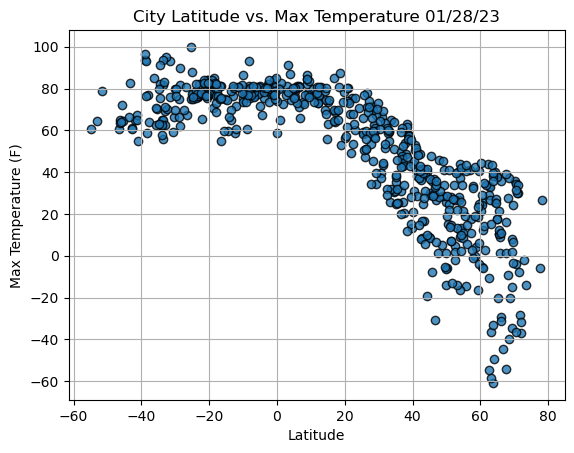

In [55]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#UPDATES THIS FOR FINAL CODE
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

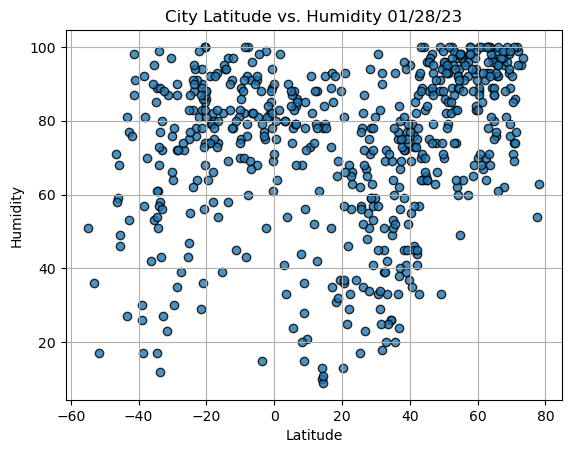

In [56]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

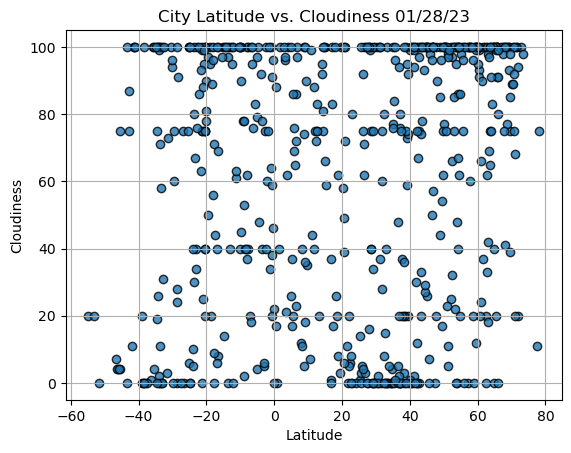

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

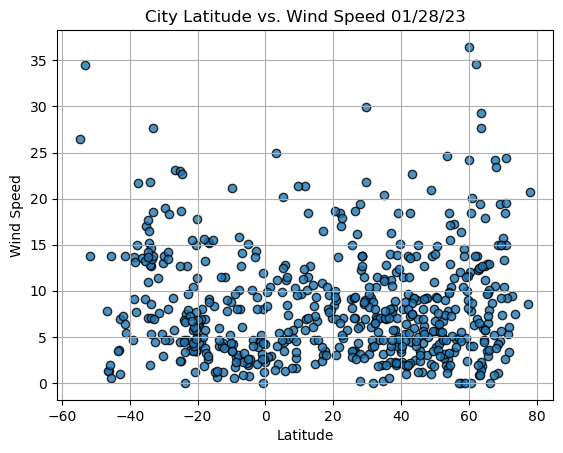

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
#

In [60]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df
#city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,-10.44,70,0,13.80,CA,2023-01-28 20:52:39
4,dumai,1.6833,101.4500,72.57,98,100,2.89,ID,2023-01-28 20:52:40
5,quang ngai,15.1167,108.8000,63.05,92,100,6.73,VN,2023-01-28 20:52:40
6,gushikawa,26.3544,127.8686,51.03,87,100,3.44,JP,2023-01-28 20:52:41
11,mohgaon,21.6500,78.7167,67.73,46,0,3.91,IN,2023-01-28 20:52:42
...,...,...,...,...,...,...,...,...,...
583,jalu,29.0331,21.5482,56.50,41,0,8.81,LY,2023-01-28 20:51:56
586,awallan,17.9244,121.9130,65.05,92,100,3.02,PH,2023-01-28 20:57:45
587,cayenne,4.9333,-52.3333,75.24,88,100,4.61,GF,2023-01-28 20:57:45


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,61.05,77,75,6.91,AU,2023-01-28 20:51:47
2,aberfoyle,-30.2667,152.0167,66.34,66,94,2.89,AU,2023-01-28 20:52:39
3,mahebourg,-20.4081,57.7000,77.25,100,75,3.44,MU,2023-01-28 20:51:55
7,bluff,-46.6000,168.3333,60.67,71,7,7.83,NZ,2023-01-28 20:50:15
8,rawson,-43.3002,-65.1023,82.87,27,0,3.56,AR,2023-01-28 20:39:50


###  Temperature vs. Latitude Linear Regression Plot

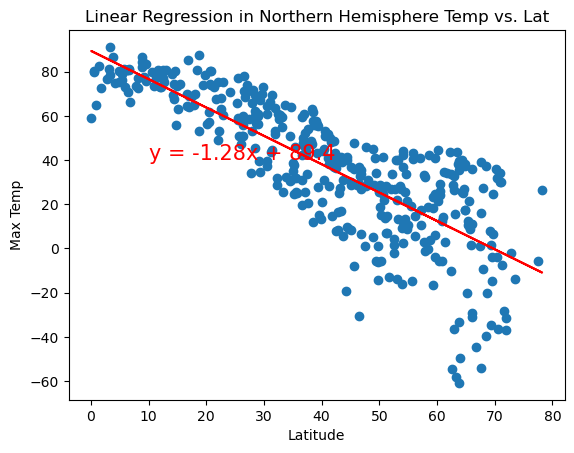

The r-value is :-0.8077830765419035


In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Northern Hemisphere Temp vs. Lat', 'Max Temp',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

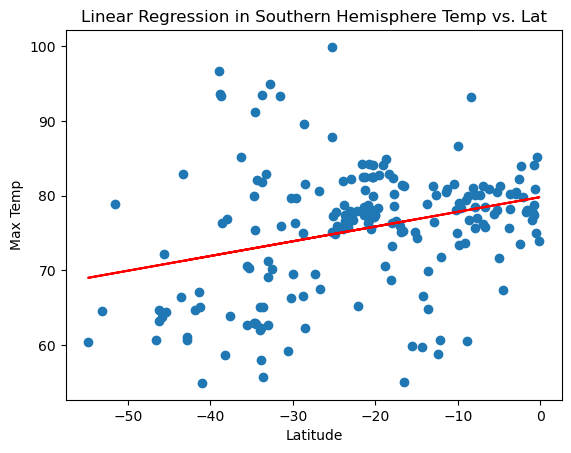

The r-value is :0.2998143952318465


In [64]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Southern Hemisphere Temp vs. Lat', 'Max Temp',(10,40))
#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

**Discussion about the linear relationship:** Between the two data sets you see that the closer a hemisphere gets to the equator the higher the Max Temp becomes. In genral the furhter you are from the equator the colder it becomes however in general it appears that the southern hemishere, though seeing a decrese in tempature sitll remands significantly high max temps then the northern. 

### Humidity vs. Latitude Linear Regression Plot

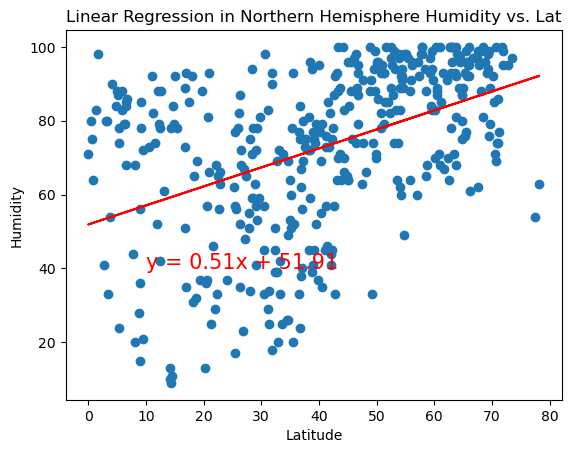

The r-value is :0.4501174885624913


In [67]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Northern Hemisphere Humidity vs. Lat', 'Humidity',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

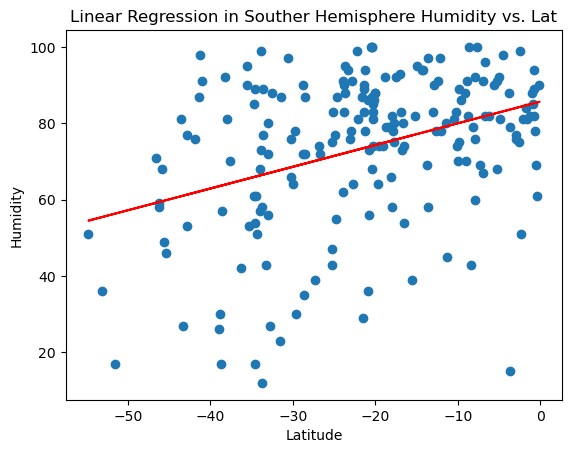

The r-value is :0.3686162628609466


In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Souther Hemisphere Humidity vs. Lat', 'Humidity',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

**Discussion about the linear relationship:** there is a strong corraltion between the two data sets that show the higher the latitude the more likely the area is to experice higher humidity 

### Cloudiness vs. Latitude Linear Regression Plot

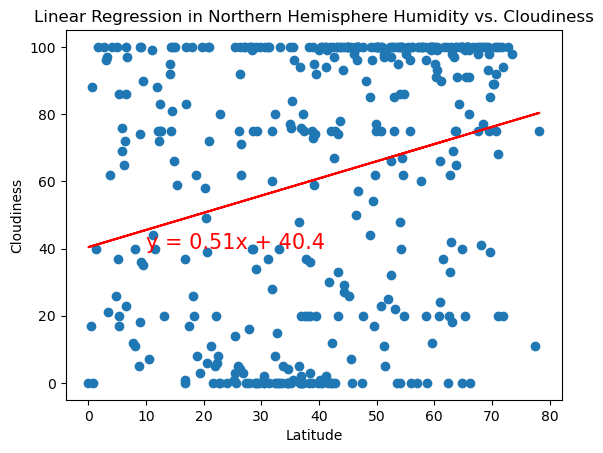

The r-value is :0.25305723023812593


In [71]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Northern Hemisphere Humidity vs. Cloudiness', 'Cloudiness',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

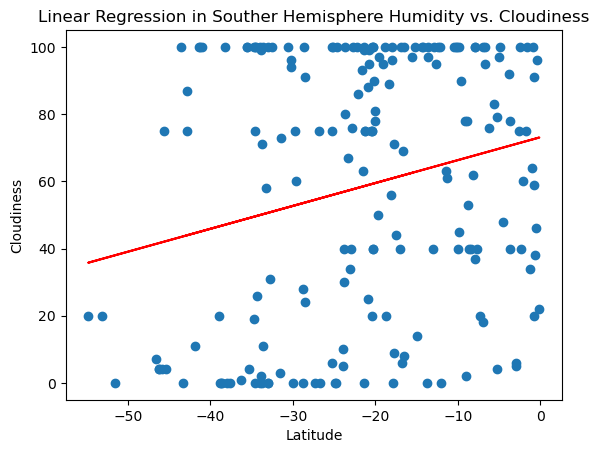

The r-value is :0.2287858008325441


In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Souther Hemisphere Humidity vs. Cloudiness', 'Cloudiness',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

**Discussion about the linear relationship:** both data set you dont see a clear corration beteewn cloudiness and latitude location however it appears that the further south you are from the equator the less likely you are to experience cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

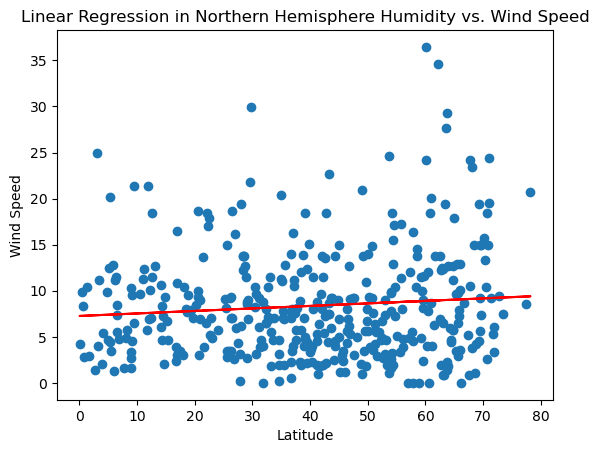

The r-value is :0.0901034999593885


In [73]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Northern Hemisphere Humidity vs. Wind Speed', 'Wind Speed',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

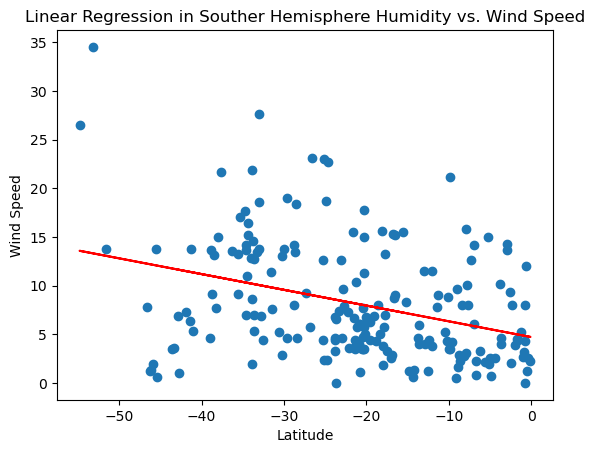

The r-value is :-0.3468335265619257


In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Souther Hemisphere Humidity vs. Wind Speed', 'Wind Speed',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

**Discussion about the linear relationship:** In the souther hemisphere the further you are from the equator the higher the wind speed is. However in the norther hemisphere you see wind speed is consistant the further way from the equator you are with a gradule increase in wind speed. 